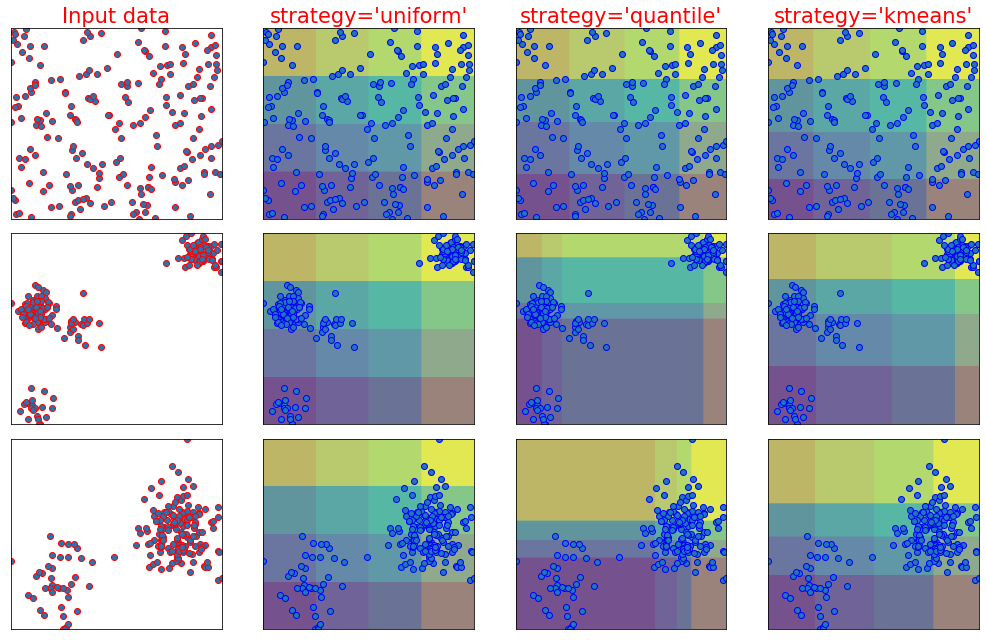

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.datasets import make_blobs


strategies = ['uniform', # All bins in each feature have identical widths.
              'quantile', # All bins in each feature have the same number of points.
              'kmeans'] # Values in each bin have the same nearest center of a 1D k-means cluster.
n_samples = 200
centers_0 = np.array([[0, 0], [0, 5], [2, 4], [8, 8]])
centers_1 = np.array([[0, 0], [3, 1]])
random_state = 42

# 样本集
X_list = [
    np.random.RandomState(random_state).uniform(-3, 3, size=(n_samples, 2)), # 均匀分布随机样本
    make_blobs(n_samples=[n_samples // 10, n_samples * 4 // 10,
                          n_samples // 10, n_samples * 4 // 10],
               cluster_std=0.5, centers=centers_0,
               random_state=random_state)[0], # Generate isotropic Gaussian blobs for clustering
    make_blobs(n_samples=[n_samples // 5, n_samples * 4 // 5],
               cluster_std=0.5, centers=centers_1,
               random_state=random_state)[0],
]

figure = plt.figure(figsize=(14, 9))
i = 1

for ds_cnt, X in enumerate(X_list):
    ax = plt.subplot(len(X_list), len(strategies) + 1, i)
    ax.scatter(X[:, 0], X[:, 1], edgecolors='r')
    if ds_cnt == 0:
        ax.set_title("Input data", size=21, color='red')

    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min(), X[:, 0].max(), 300),
        np.linspace(X[:, 1].min(), X[:, 1].max(), 300)) # xx.shape=(300, 300)
    grid = np.c_[xx.ravel(), yy.ravel()] # (90000, ) (90000, ) --> (90000, 2)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(()) # 设置y轴刻度(刻度点,刻度值,网格线)不可见

    i += 1
    for strategy in strategies:
        enc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy=strategy)
        enc.fit(X)
        grid_encoded = enc.transform(grid)
        
        ax = plt.subplot(len(X_list), len(strategies) + 1, i)
        
        # 垂直条纹
        vertical = grid_encoded[:, 0].reshape(xx.shape)
        ax.contourf(xx, yy, vertical, alpha=.5)
        # 水平条纹
        horizontal = grid_encoded[:, 1].reshape(xx.shape)
        ax.contourf(xx, yy, horizontal, alpha=.5)

        ax.scatter(X[:, 0], X[:, 1], edgecolors='b')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title("strategy='%s'" % (strategy, ), size=21, color='red')

        i += 1

plt.tight_layout()
plt.show()

In [8]:
# vertical生成过程:
# xx = min ... max 
#    = min ... max
#    =     ...  
#    = min ... max
# xx.shape = (300, 300)

# grid[:, 0] = min ... max min ... max ...... min max 
# grid[:, 0].shape = [90000, ]

# grid_encoded[:, 0] = enc.transform(grid[:, 0])
# grid_encoded[:, 0].shape = [90000, 1]

# vertical = grid_encoded[: 0].reshape(xx.shape) 

# horizontal生成过程同理